In [2]:
import numpy as np

import matplotlib.pyplot as plt



In [3]:
ecgs_labels = np.load('ecgs_labels.npy')
X = ecgs_labels[:,:-1]
y = ecgs_labels[:,-1]

fs = 250 # sampling frequency

Go

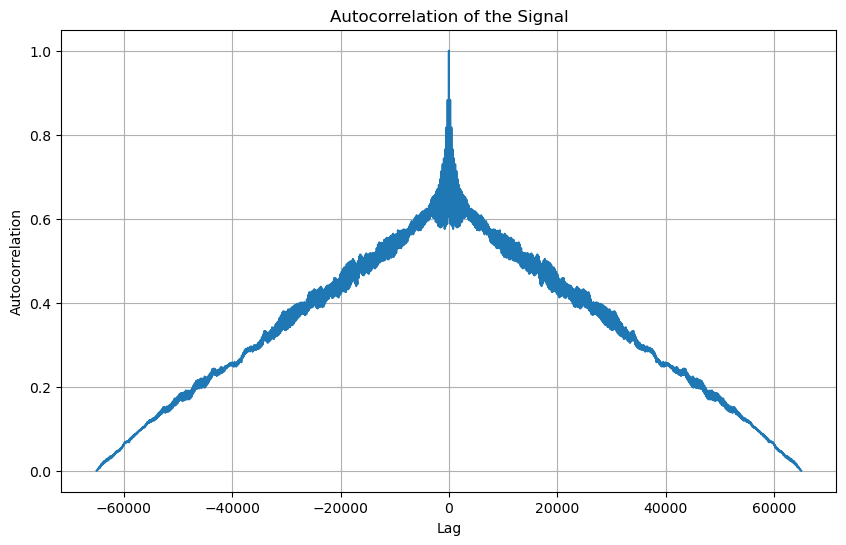

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
# Sample signal: a combination of two sinusoidal waves with different frequencies
signal = X[0] #np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# Compute the autocorrelation of the signal
autocorrelation = np.correlate(signal, signal, mode='full')
# Normalize the autocorrelation
autocorrelation = autocorrelation / np.max(autocorrelation)

# Generate the lag vector
lags = np.arange(-len(signal) + 1, len(signal))

# Plot the autocorrelation
plt.figure(figsize=(10, 6))
plt.plot(lags, autocorrelation)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the Signal')
plt.grid()
plt.show()


In [5]:
import numpy as np
from scipy.fft import fft, ifft, fftfreq

def low_dimensional_kernel_1d(signal, sample_rate, cutoff_frequency):
    """
    Compute the low-dimensional kernel in the Fourier space for 1D signal.
    
    Parameters:
    - signal: The input 1D signal.
    - sample_rate: The sample rate of the signal.
    - cutoff_frequency: The cutoff frequency to mask out high frequencies (in Hz).
    
    Returns:
    - low_dim_kernel: The low-dimensional kernel in the time domain.
    """
    # Perform FFT on the signal
    signal_fft = fft(signal)
    
    # Get the frequency bins corresponding to the FFT result
    frequencies = fftfreq(len(signal), d=1/sample_rate)
    
    # Create a mask to keep only the frequencies below the cutoff
    mask = np.abs(frequencies) <= cutoff_frequency
    
    # Apply the mask to keep only low frequencies
    low_freq_signal_fft = signal_fft * mask
    
    # Compute the inverse FFT to get the low-dimensional kernel
    low_dim_kernel = ifft(low_freq_signal_fft)
    
    return np.real(low_dim_kernel)

# # Example usage:
# sample_rate = 1000  # Sample rate in Hz
# t = np.linspace(0, 1, sample_rate, endpoint=False)  # Time vector
# signal = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 5 * t)  # Example signal with 1 Hz and 5 Hz components
# cutoff_frequency = 3  # Cutoff frequency in Hz

# # low_dim_kernel = low_dimensional_kernel_1d(signal, sample_rate, cutoff_frequency)

# # print("Original signal:", signal)
# # print("Low-dimensional kernel:", low_dim_kernel)


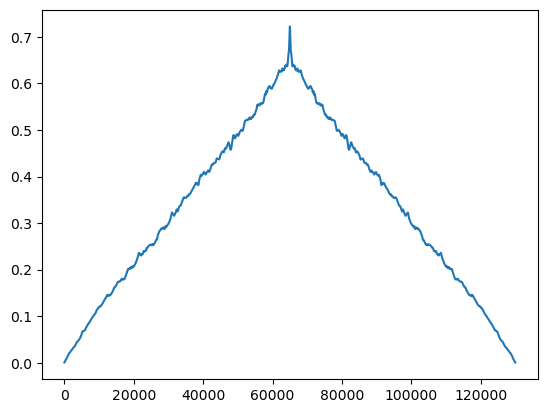

In [6]:
plt.plot(low_dimensional_kernel_1d(autocorrelation,sample_rate=fs,cutoff_frequency=3))

In [7]:
X.shape

(1165, 65000)

In [8]:
from scipy.signal import correlate

In [9]:
correlate(X[0],X[0],)

array([0.128  , 0.2468 , 0.36015, ..., 0.36015, 0.2468 , 0.128  ])

In [10]:
correlate(X,X)

array([[0.01603914, 0.03129839, 0.04640142, ..., 0.04698552, 0.03158247,
        0.016     ],
       [0.0328177 , 0.06478765, 0.09615685, ..., 0.11272217, 0.07451393,
        0.0374    ],
       [0.0556549 , 0.10966794, 0.16331066, ..., 0.25429815, 0.16973078,
        0.0868    ],
       ...,
       [0.0868    , 0.16973078, 0.25429815, ..., 0.16331066, 0.10966794,
        0.0556549 ],
       [0.0374    , 0.07451393, 0.11272217, ..., 0.09615685, 0.06478765,
        0.0328177 ],
       [0.016     , 0.03158247, 0.04698552, ..., 0.04640142, 0.03129839,
        0.01603914]])

In [11]:
# np.correlate(X, X, mode='full').shape

In [12]:
def low_dimensional_kernel_1d(signal, sample_rate, cutoff_frequency):
    """
    Compute the low-dimensional kernel in the Fourier space for 1D signal.
    
    Parameters:
    - signal: The input 1D signal.
    - sample_rate: The sample rate of the signal.
    - cutoff_frequency: The cutoff frequency to mask out high frequencies (in Hz).
    
    Returns:
    - low_dim_kernel: The low-dimensional kernel in the time domain.
    """
    # Perform FFT on the signal
    signal_fft = fft(signal)
    
    # Get the frequency bins corresponding to the FFT result
    frequencies = fftfreq(len(signal), d=1/sample_rate)
    
    # Create a mask to keep only the frequencies below the cutoff
    mask = np.abs(frequencies) <= cutoff_frequency
    
    # Apply the mask to keep only low frequencies
    low_freq_signal_fft = signal_fft * mask
    
    # Compute the inverse FFT to get the low-dimensional kernel
    low_dim_kernel = ifft(low_freq_signal_fft)
    
    return np.real(low_dim_kernel)

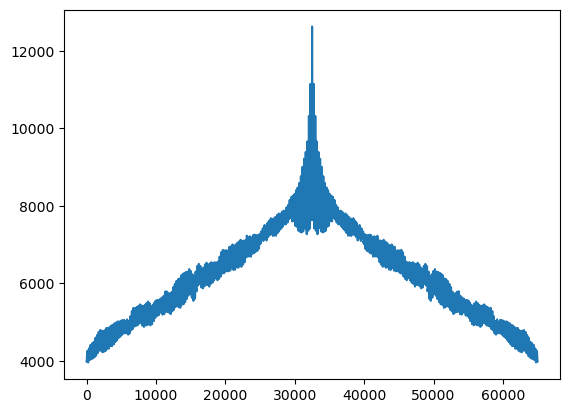

In [13]:
plt.plot(np.correlate(X[0],X[0], mode='same'))

In [14]:
fX0 = np.fft.fft(X[0])

c:\Users\aejog\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


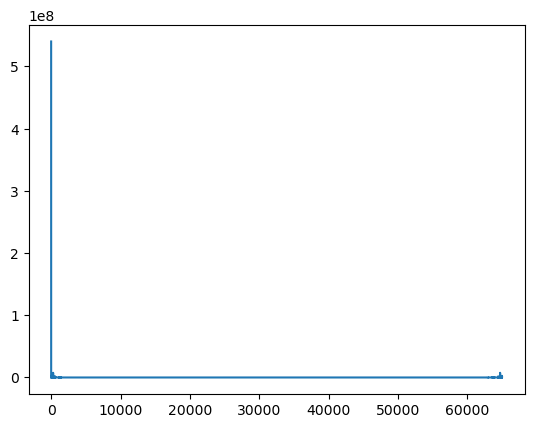

In [15]:
plt.plot(fft(X[0]) * np.conj(fft(X[0])))


(1165, 65000)
(1165, 65000)
(1165, 65000)
(1165, 65000)
Autocorrelations shape: (1165, 65000)


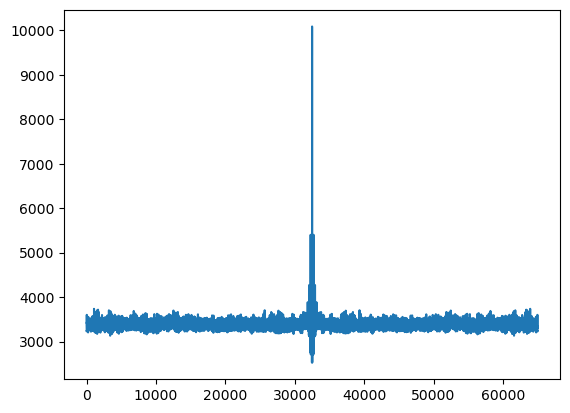

In [16]:
import numpy as np
from scipy.fft import fft, ifft

def compute_autocorrelation(signals):
    """
    Compute the autocorrelation for multiple signals efficiently.
    
    Parameters:
    - signals: A 2D numpy array with shape (n_signals, signal_length).
    
    Returns:
    - autocorrelations: A 2D numpy array containing the autocorrelations.
    """
    print(signals.shape)
    # Compute the FFT of each signal
    signals_fft = fft(signals, axis=1)
    print(signals_fft.shape)
    # Compute the power spectrum
    power_spectrum = signals_fft * np.conj(signals_fft)
    print(power_spectrum.shape)
    # Compute the inverse FFT of the power spectrum to get the autocorrelation
    autocorrelations = ifft(power_spectrum, axis=1)
    print(autocorrelations.shape)
    # Only keep the real part (the imaginary part should be negligible)
    autocorrelations = np.real(autocorrelations)
    
    return np.fft.ifftshift(autocorrelations)

# Example usage:
n_signals = 5
signal_length = 1000
signals = X#np.random.rand(n_signals, signal_length)  # Example signals

autocorrelations = compute_autocorrelation(signals)

print("Autocorrelations shape:", autocorrelations.shape)
# print("Autocorrelations for the first signal:", autocorrelations[0])
plt.plot(autocorrelations[0])

# plt.plot(np.correlate(signals[0],signals[0],mode='full'))

Autocorrelations shape: (2, 129999)
Autocorrelation for the first signal (FFT): [3.29230769e-06 3.29230769e-06 6.57423077e-06 ... 1.31846154e-05
 9.91692308e-06 6.57423077e-06]
Autocorrelation for the first signal (numpy): [0.128   0.2468  0.36015 ... 0.36015 0.2468  0.128  ]
Difference: 12627.909800738076


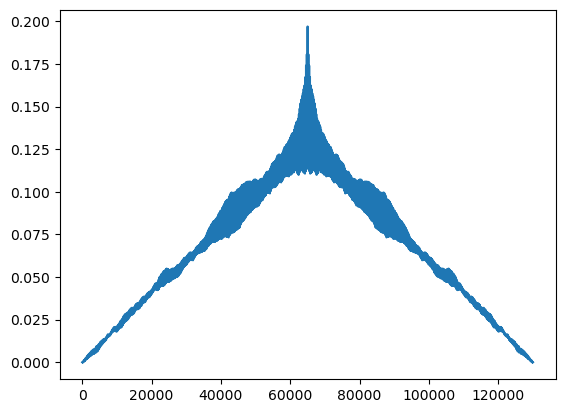

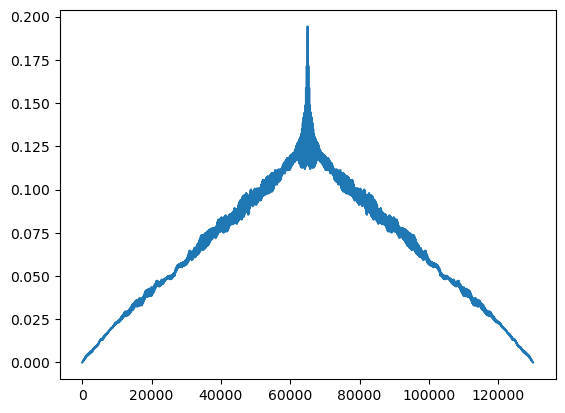

In [17]:
import numpy as np
from scipy.fft import fft, ifft

def compute_autocorrelation(signals):
    """
    Compute the autocorrelation for multiple signals efficiently.
    
    Parameters:
    - signals: A 2D numpy array with shape (n_signals, signal_length).
    
    Returns:
    - autocorrelations: A 2D numpy array containing the autocorrelations.
    """
    n_signals, signal_length = signals.shape
    # Padding signals to avoid circular convolution effects
    padded_signals = np.pad(signals, ((0, 0), (0, signal_length-1)), mode='constant')
    
    # Compute the FFT of each padded signal
    signals_fft = fft(padded_signals, axis=1)
    
    # Compute the power spectrum
    power_spectrum = signals_fft * np.conj(signals_fft)
    
    # Compute the inverse FFT of the power spectrum to get the autocorrelation
    autocorrelations = ifft(power_spectrum, axis=1)
    
    # Only keep the real part (the imaginary part should be negligible)
    autocorrelations = np.real(autocorrelations)
    
    # Normalize the autocorrelation
    autocorrelations /= signal_length
    
    return np.fft.ifftshift(autocorrelations[:, :2*signal_length-1])

# Example usage:
n_signals = 5
signal_length = 1000
signals = X[:2]#np.random.rand(n_signals, signal_length)  # Example signals

autocorrelations = compute_autocorrelation(signals)

print("Autocorrelations shape:", autocorrelations.shape)

# Verify with numpy correlate
autocorr_np = np.correlate(signals[0], signals[0], mode='full')
print("Autocorrelation for the first signal (FFT):", autocorrelations[0])
print("Autocorrelation for the first signal (numpy):", autocorr_np)

# Check if both methods give the same result
print("Difference:", np.max(np.abs(autocorrelations[0] - autocorr_np)))

plt.plot(autocorrelations[0])
plt.show()
plt.plot(autocorr_np/X.shape[-1])

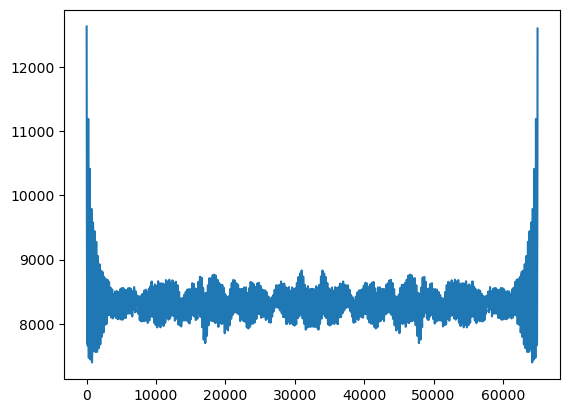

In [18]:
def autocor(X, sample_rate, cutoff_frequency):
    # Compute the autocorrelation of the signal
    # Compute the FFT of each signal
    signals_fft = fft(X, axis=1)
    frequencies = fftfreq(X.shape[1], d=1/sample_rate)
    mask = np.abs(frequencies) <= cutoff_frequency
    
    # Compute the power spectrum
    power_spectrum = signals_fft * np.conj(signals_fft)
    autocorrelations = ifft(power_spectrum, axis=1)
    
    # Only keep the real part (the imaginary part should be negligible)
    autocorrelations = np.real(autocorrelations)
    
    return autocorrelations


plt.plot(autocor(X,250,3)[0])

(65000,)
(1165, 65000)


c:\Users\aejog\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


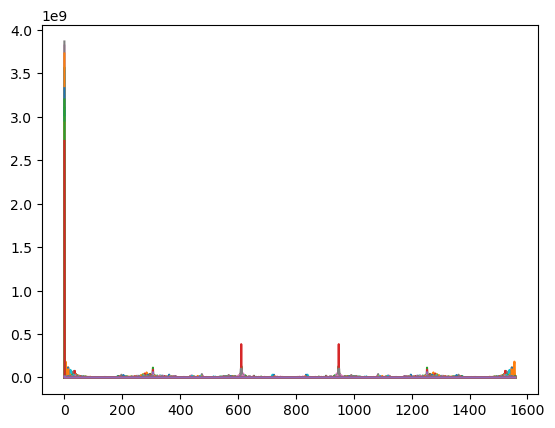

(130000,)
(1165, 3119)


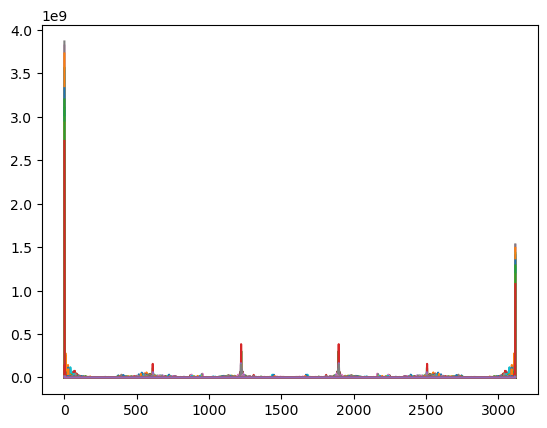

Autocorrelations shape: (1165, 3119)
Autocorrelation for the first signal (FFT): [5.39950036e+08+0.j 2.08173480e+08+0.j 5.57596797e+05+0.j ...
 2.66236464e+07+0.j 5.57596797e+05+0.j 2.08173480e+08+0.j]
Autocorrelation for the first signal (numpy): [3981.4632   3983.40465  3985.616275 ... 3988.0248   3985.616275
 3983.40465 ]


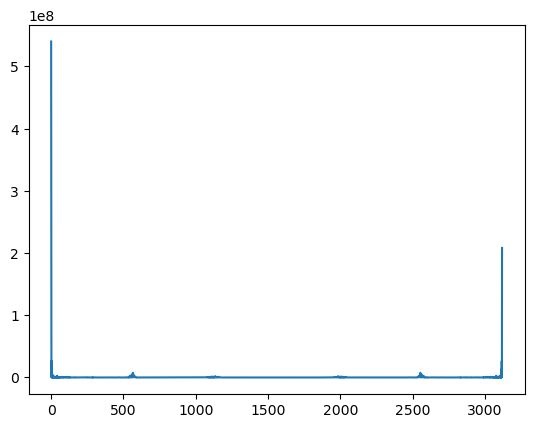

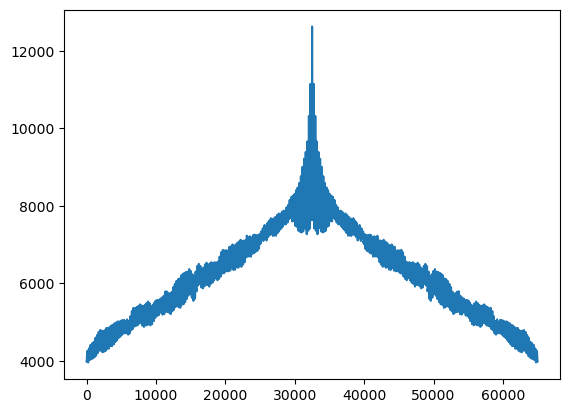

In [41]:
import numpy as np
from scipy.fft import fft, ifft, ifftshift

def compute_autocorrelation_same(signals, sample_rate=250, cutoff_frequency=3):
    """
    Compute the autocorrelation for multiple signals efficiently with mode='same'.
    
    Parameters:
    - signals: A 2D numpy array with shape (n_signals, signal_length).
    
    Returns:
    - autocorrelations: A 2D numpy array containing the autocorrelations with shape 'same'.
    """
    n_signals, signal_length = signals.shape
    
    pad = np.zeros_like(signals)
    # Compute the FFT of each signal
    #signals = np.concatenate([signals,pad],axis = 1)
    frequencies = fftfreq(signals.shape[1], d=1/sample_rate)
    signals_fft = fft(signals, axis=1)
    print(frequencies.shape)
    print(signals_fft.shape)
    mask = np.abs(frequencies)  < cutoff_frequency 
    signals_fft = signals_fft[:,mask]
    # Compute the power spectrum
    power_spectrum = signals_fft * np.conj(signals_fft)
    
    # Compute the inverse FFT of the power spectrum to get the autocorrelation
    autocorrelations = ifft(power_spectrum, axis=1)
    plt.plot(power_spectrum.T)
    plt.show()

    pad = np.zeros_like(signals)
    # Compute the FFT of each signal
    signals = np.concatenate([signals,pad],axis = 1)
    frequencies = fftfreq(signals.shape[1], d=1/sample_rate)
    signals_fft = fft(signals, axis=1)
    print(frequencies.shape)
    
    mask = np.abs(frequencies)  < cutoff_frequency 
    signals_fft = signals_fft[:,mask]
    print(signals_fft.shape)
    # Compute the power spectrum
    power_spectrum = signals_fft * np.conj(signals_fft)
    
    # # Compute the inverse FFT of the power spectrum to get the autocorrelation
    # autocorrelations = ifft(power_spectrum, axis=1)
    plt.plot(power_spectrum.T)
    plt.show()
    # # Only keep the real part (the imaginary part should be negligible)
    # autocorrelations = np.real(autocorrelations)
    
    # # Normalize the autocorrelation
    # autocorrelations /= signal_length
    
    # # Extract the central part to match mode='same'
    # autocorrelations = ifftshift(autocorrelations, axes=1)
    # center_idx = signal_length // 2
    # # autocorrelations = autocorrelations[:, center_idx:center_idx+signal_length]
    
    return power_spectrum

# Example usage:
n_signals = 5
signal_length = 1000
signals = X# np.random.rand(n_signals, signal_length)  # Example signals

power_spectrum = compute_autocorrelation_same(signals)

print("Autocorrelations shape:", autocorrelations.shape)

# Verify with numpy correlate
autocorr_np = np.correlate(signals[0], signals[0], mode='same')
print("Autocorrelation for the first signal (FFT):", autocorrelations[0])
print("Autocorrelation for the first signal (numpy):", autocorr_np)

# Check if both methods give the same result
# print("Difference:", np.max(np.abs(autocorrelations[0] - autocorr_np)))
plt.plot(autocorrelations[0])
plt.show()
plt.plot(autocorr_np)

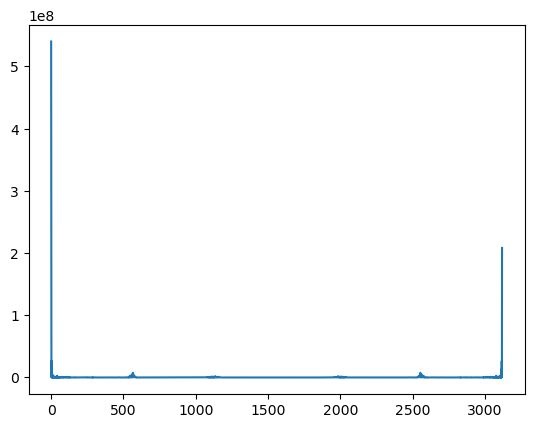

In [42]:
plt.plot(power_spectrum[0,:])

In [43]:
np.fft.fftfreq(X.shape[-1],d = 1 /fs)

array([ 0.        ,  0.01538462,  0.03076923, ..., -0.04615385,
       -0.03076923, -0.01538462])

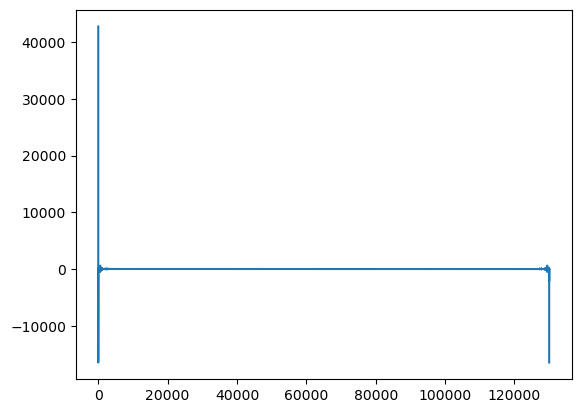

In [44]:
plt.plot(np.fft.fft(autocorrelation))

Low-dimensional kernel shape: (65000,)


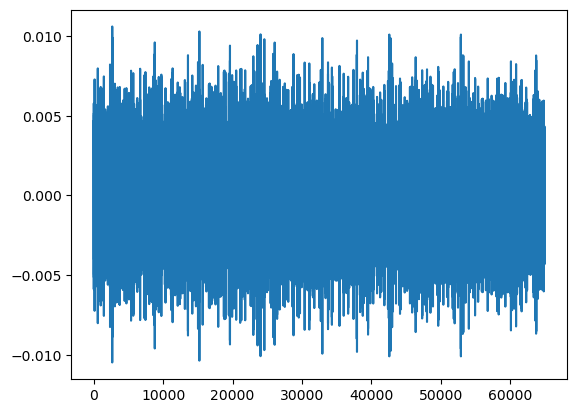

In [45]:
import numpy as np
from scipy.fft import fftn, ifftn, fftshift

def low_dimensional_kernel(signal, cutoff_ratio):
    """
    Compute the low-dimensional kernel in the Fourier space.
    
    Parameters:
    - signal: The input signal or data.
    - cutoff_ratio: The ratio of frequencies to keep (0 < cutoff_ratio <= 1).
    
    Returns:
    - low_dim_kernel: The low-dimensional kernel in the Fourier domain.
    """
    # Perform FFT on the signal
    signal_fft = fftn(signal)
    
    # Get the shape of the FFT result
    shape = signal_fft.shape
    
    # Calculate the cutoff indices
    cutoff_indices = tuple(int(dim * cutoff_ratio) for dim in shape)
    
    # Create a mask to keep only the low frequencies
    mask = np.zeros(shape, dtype=bool)
    center = tuple(dim // 2 for dim in shape)
    
    # Create a slice to mask out high frequencies
    slices = tuple(slice(center[i] - cutoff_indices[i]//2, center[i] + cutoff_indices[i]//2) for i in range(len(shape)))
    mask[slices] = True
    
    # Apply the mask to keep only low frequencies
    low_freq_signal_fft = signal_fft * mask
    
    # Compute the inverse FFT to get the low-dimensional kernel
    low_dim_kernel = ifftn(low_freq_signal_fft)
    
    return np.real(low_dim_kernel)

# Example usage:
# signal = np.random.rand(256, 256)  # Example 2D signal
cutoff_ratio = 0.1  # Keep only the lowest 10% of frequencies

low_dim_kernel = low_dimensional_kernel(signal, cutoff_ratio)

print("Low-dimensional kernel shape:", low_dim_kernel.shape)
plt.plot(low_dim_kernel)